# Project Titanic

In the tragic Titanic shipwreck, what factors made people more likely to survive?

## Examining the data set

Let's first import and take a look at the dataset. There were in total 891 passengers on the ship. Among them, there were 577 male passengers and 314 female passengers. The number of male passengers was about 1.8 times that of female passengers. The number of passengers who were adult (age >= 18) was 601. The number of passengers who were not adult was 113. Notice that the sum of these two numbers is smaller than the total number of passengers. This is because that age information of some passengers is missing. There were 3 cabin classes on Titanic. The number of passengers in the first class and in the second class was 216 and 184, respectively, which were comparable. The number of passengers in the third class was 491, which was more than half of the total number of passengers. 354 passengers came as families, which means that they came with either their siblings, spouses, parents, or children. 537 passengers came on board alone.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

df = pd.read_csv('titanic_data.csv')
num_passengers = len(df)
num_male_passengers = len(df[df.Sex == 'male'])
num_female_passengers = len(df[df.Sex == 'female'])
print('Total number of passengers: {} \nNumber of male passengers: {} \nNumber of female passengers: {}'\
      .format(num_passengers, num_male_passengers, num_female_passengers))
print('\n')
num_child_passengers = len(df[df.Age < 18])
num_adult_passengers = len(df[df.Age >= 18])
print('Number of adult passengers: {} \nNumber of non-adult passengers: {}'.format(num_adult_passengers,num_child_passengers))
print('\n')
num_1class_passengers = len(df[df.Pclass == 1])
num_2class_passengers = len(df[df.Pclass == 2])
num_3class_passengers = len(df[df.Pclass == 3])
print('Number of first class passengers: {} \nNumber of second class passengers: {} \nNumber of third class passengers: {}'\
      .format(num_1class_passengers,num_2class_passengers,num_3class_passengers))
print('\n')
num_family_passengers = len(df[(df.SibSp != 0) | (df.Parch != 0)])
num_single_passengers = len(df[(df.SibSp == 0) & (df.Parch == 0)])
print('Number of passengers who came with families: {} \nNumber of passengers who came alone: {}'\
      .format(num_family_passengers, num_single_passengers))

Populating the interactive namespace from numpy and matplotlib
Total number of passengers: 891 
Number of male passengers: 577 
Number of female passengers: 314


Number of adult passengers: 601 
Number of non-adult passengers: 113


Number of first class passengers: 216 
Number of second class passengers: 184 
Number of third class passengers: 491


Number of passengers who came with families: 354 
Number of passengers who came alone: 537


## Gender

Let's save the information about all survived passengers in another dataframe called df_survived. There were in total 342 passengered who survived, which was only 38% of the passengers on board. Among them there were 109 male passengers and 233 female passengers. The number of female passengers survived was about twice that of male passengers survived. The survival rate of female passengers and male passengers was 74.2% and 18.9%, respectively. It is apparent that female passengers were more likely to survive than male passengers.

In [2]:
df_survived = df[df.Survived == 1]
num_survived = len(df_survived)
num_male_survived = len(df_survived[df_survived.Sex == 'male'])
num_female_survived = len(df_survived[df_survived.Sex == 'female'])
print('Total number of survived passengers: {} \nNumber of male passengers survived: {} \nNumber of female passengers \
survived: {}'.format(num_survived, num_male_survived, num_female_survived))

Total number of survived passengers: 342 
Number of male passengers survived: 109 
Number of female passengers survived: 233


Text(0.5, 1.0, 'Percentage of survived and not survived \nmale passengers')

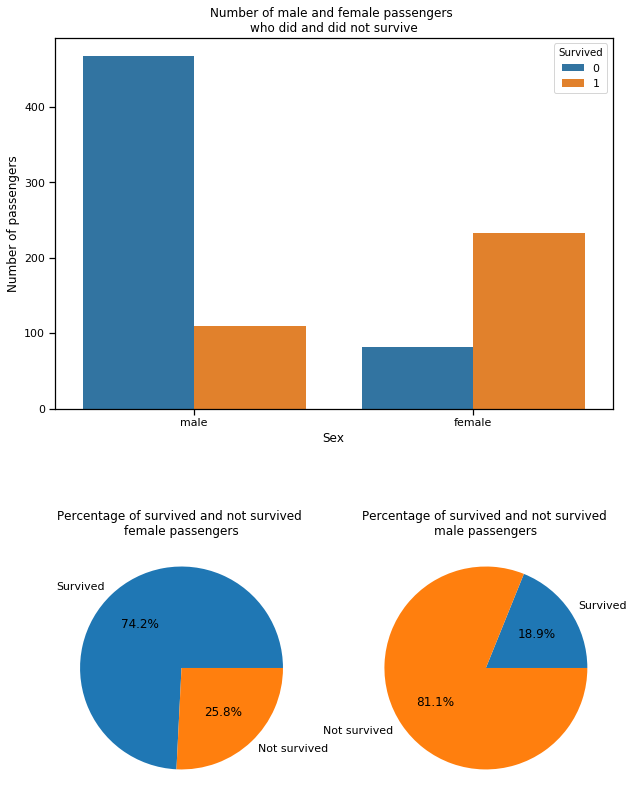

In [3]:
sns.set_context('notebook')

plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
sns.barplot(data=df, x='Sex', y='Survived', estimator=len, hue='Survived')
plt.ylabel('Number of passengers')
plt.title("Number of male and female passengers \nwho did and did not survive")

plt.subplot(2,2,3)
plt.pie([num_female_survived,num_female_passengers-num_female_survived],labels=['Survived','Not survived'],autopct='%.1f%%')
plt.title('Percentage of survived and not survived \nfemale passengers')

plt.subplot(2,2,4)
plt.pie([num_male_survived,num_male_passengers-num_male_survived],labels=['Survived','Not survived'],autopct='%.1f%%')
plt.title('Percentage of survived and not survived \nmale passengers')


## Age

Let's categorize the survived passengers into 8 age ranges: 0 to 10 years old (upper bound inclusive), 10 to 20 years old, 20 to 30 years old, 30 to 40 years old, 40 to 50 years old, 50 to 60 years old, 60 to 70 years old, 70 to 80 years old. The age category 20 to 30 years old had the highest number of survived passengers, followed by 30 to 40 years old, 10 to 20 years old, and 0 to 10 years old. From 40 years and above, the number of survived passengers decreased with increasing age. Generally speaking, younger people were given more chance to survive than older people.

E:\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


  Age category  Number of survived passengers
0      0 to 10                             38
1     10 to 20                             44
2     20 to 30                             84
3     30 to 40                             69
4     40 to 50                             33
5     50 to 60                             17
6     60 to 70                              4
7     70 to 80                              1


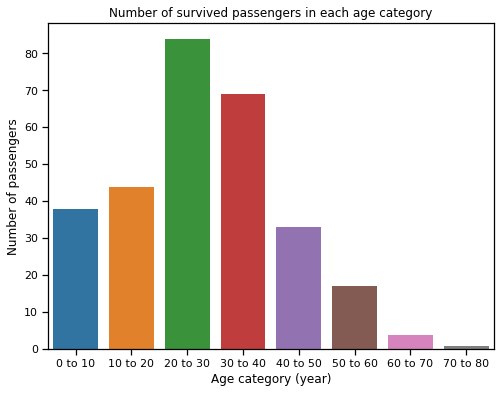

In [11]:
def age_category(age):
    if 0 <= age <= 10:
        return '0 to 10'
    elif age <= 20:
        return '10 to 20'
    elif age <= 30:
        return '20 to 30'
    elif age <= 40:
        return '30 to 40'
    elif age <= 50:
        return '40 to 50'
    elif age <= 60:
        return '50 to 60'
    elif age <= 70:
        return '60 to 70'
    elif age <= 80:
        return '70 to 80'
    else:
        return None

df_survived['Age_category'] = df_survived.Age.apply(age_category)
plt.figure(figsize=(8,6))
sns.barplot(data=df_survived, x='Age_category', y='Survived', estimator=len, order=['0 to 10','10 to 20','20 to 30',\
                                                                                         '30 to 40','40 to 50','50 to 60',\
                                                                                         '60 to 70','70 to 80'])
plt.ylabel('Number of passengers')
plt.xlabel('Age category (year)')
plt.title("Number of survived passengers in each age category")

df_survived_agecategory = df_survived.groupby('Age_category',as_index=False).Name.count()
df_survived_agecategory.rename(columns={'Age_category':'Age category','Name':'Number of survived passengers'},inplace=True)
print(df_survived_agecategory)


The oldest passenger who survived the titanic disaster was 80 years old at that time. I found that his name was Mr. Algernon Henry Wilson Barkworth. He held a first class ticket and embarked at Southampton alone. It is interesting that he survived in spite that both his gender and age group were classied as less likely to survive. I wonder what a story this man had.

I also noticed that among the 4 survivers in the age group 60 to 70 years old, 2 were first class ticket holders. Does ticket class have a correlation with survival liklihood?

In [5]:
oldest_surviver = df_survived[df_survived.Age == 80]
print(oldest_surviver)
old_survivers = df_survived[df_survived.Age_category == '60 to 70']
print(old_survivers)

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked Age_category  
630  male  80.0      0      0  27042  30.0   A23        S     70 to 80  
     PassengerId  Survived  Pclass                                       Name  \
275          276         1       1          Andrews, Miss. Kornelia Theodosia   
483          484         1       3                     Turkula, Mrs. (Hedwig)   
570          571         1       2                         Harris, Mr. George   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch       Ticket     Fare Cabin Embarked  \
275  female  63.0      1      0        13502  77.9583    D7        S   
483  female  63.0      0      0         4134   9.5875   NaN        S   
570    male  62.0      0      0  S.W./PP 752  10.5000   NaN        S   
829  fe

## Ticket class

Among the survived passengers, there were 136 from the first class, 87 from the second class, and 119 from the third class. The survival rate for the three classes were 63.0%, 47.3%, and 24.2%, respectively. Passengers with higher cabin class had greater chance to survive.

Number of first class passengers survived: 136 
Number of second class passengers survived: 87 
Number of third class passengers survived: 119


Text(0.5, 1.0, 'Number of survived and not survived passengers in the three classes')

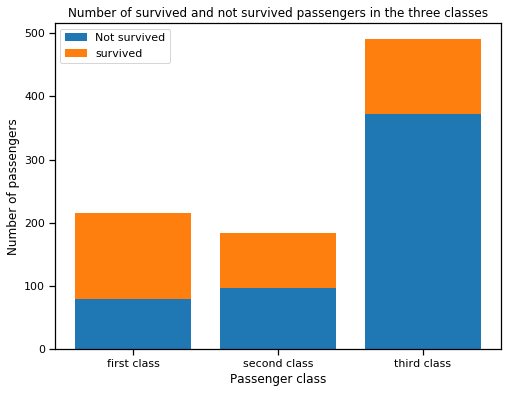

In [6]:
num_1class_survived = len(df_survived[df_survived.Pclass == 1])
num_2class_survived = len(df_survived[df_survived.Pclass == 2])
num_3class_survived = len(df_survived[df_survived.Pclass == 3])
print('Number of first class passengers survived: {} \nNumber of second class passengers survived: {} \nNumber of third class passengers survived: {}'\
      .format(num_1class_survived,num_2class_survived,num_3class_survived))

class_not_survived = bottom=[num_1class_passengers-num_1class_survived,num_2class_passengers-num_2class_survived,num_3class_passengers-num_3class_survived]
plt.figure(figsize=(8,6))
ax = plt.subplot()
plt.bar(x=range(3),height=class_not_survived)
plt.bar(x=range(3),height=[num_1class_survived,num_2class_survived,num_3class_survived],bottom=class_not_survived)
ax.set_xticks(range(3))
ax.set_xticklabels(['first class','second class','third class'])
plt.xlabel('Passenger class')
plt.ylabel('Number of passengers')
plt.legend(['Not survived','survived'])
plt.title('Number of survived and not survived passengers in the three classes')

## Family members

Did passengers who came with family members have a better chance to survive (possibly due to help from family members)? The number of survived passengers who came with families was 179, and of those who came alone was 163. Given the number of total passengers on board (with or without families), the survival rate was 50.6% for those who came with families and 30.4% for those without. It is indeed true that passengers who came with family members had a greater chance to survive, probably based on both practical help and mental support from their family members. But did families tend to survive together? Or only some members of a family could survive? I did the following analysis in order to answer these questions.

In [7]:
num_family_survived = len(df_survived[(df_survived.SibSp != 0) | (df_survived.Parch != 0)])
num_single_survived = len(df_survived[(df_survived.SibSp == 0) & (df_survived.Parch == 0)])
print('Number of survived passengers who came with families: {} \nNumber of survived passengers who came alone: {}'\
      .format(num_family_survived, num_single_survived))

Number of survived passengers who came with families: 179 
Number of survived passengers who came alone: 163


The data of passengers who came with their family members is stored in a new dataframe df_family. I suppose that in most cases, family members tend to have the same last name. This assumption is not always true, but it doesn't affect our analysis too much. I grouped the dataframe df_family by passengers' last names, and counted the number of family members under each last name. The result shows that some last names have only 1 member, which corresponds to the case that not all family members have the same last name. Since it is not possible to locate other family members (with a different last name) for these cases, I decided to discard them. I also counted the number of survived members for each last name, and listed it as column three in the table below. Among a total of 104 families (roughly), members of 32 all survived, members of 29 all died, members of 43 partly survived.

In [8]:
df_family = df[(df.SibSp != 0) | (df.Parch != 0)]
df_family['Last_name'] = df_family.Name.apply(lambda name:name.split(',')[0])
df_family['First_name'] = df_family.Name.apply(lambda name:name.split(',')[1])
df_family_last_name = df_family.groupby('Last_name')

df_family_last_name_2 = pd.concat([df_family_last_name['Name'].count(), df_family_last_name['Survived'].sum()], axis=1)
df_family_last_name_2.columns = ['Number of members','Number of survived members']
print(df_family_last_name_2.head())

df_family_last_name_3 = df_family_last_name_2[df_family_last_name_2['Number of members'] > 1]
print(df_family_last_name_3.head(10))
print('\n')

num_families = len(df_family_last_name_3)
num_families_all_survived = len(df_family_last_name_3[df_family_last_name_3['Number of members']\
                                                      ==df_family_last_name_3['Number of survived members']])
num_families_all_died = len(df_family_last_name_3[df_family_last_name_3['Number of survived members']==0])
num_families_partly_survived = num_families-num_families_all_survived-num_families_all_died
print('Number of families based on the same last name: {}'.format(num_families))
print('Number of families whose members all survived: {}'.format(num_families_all_survived))
print('Number of families whose members all died: {}'.format(num_families_all_died))
print('Number of families whose members partly survived: {}'.format(num_families_partly_survived))

E:\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


           Number of members  Number of survived members
Last_name                                               
Abbott                     2                           1
Abelson                    2                           1
Ahlin                      1                           0
Aks                        1                           1
Allison                    3                           1
                Number of members  Number of survived members
Last_name                                                    
Abbott                          2                           1
Abelson                         2                           1
Allison                         3                           1
Andersson                       8                           1
Arnold-Franchi                  2                           0
Asplund                         4                           3
Backstrom                       2                           1
Baclini                         4          

Text(0.5, 1.0, 'Percentage of families on the Titanic whose members \nall survived, all died, or partly survived')

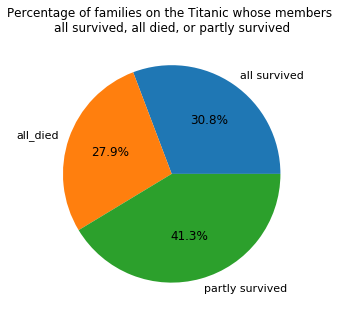

In [9]:
plt.figure(figsize=(5,5))
plt.pie([num_families_all_survived, num_families_all_died, num_families_partly_survived],\
       labels=['all survived','all_died','partly survived'], autopct='%.1f%%')
plt.title('Percentage of families on the Titanic whose members \nall survived, all died, or partly survived')